# **Extended Depth of Field**

### Author: Jose Lainer


Depth of Field refers to the range of distance over which a subject appears in-focus in a photographic image. The objective is to extend the depth of field without sacrificing resolution or brightness, making it possible to clearly capture a subject without adjusting interval and angle between subject and camera. 

This code receives different images of the same set of objects, focused at different unknown distances and generates a composite image where the different objects appear in focus simultaneously.

## **1. Install packages**

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# Mount the drive folder. This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

# Opens the project folder. 
%cd 'drive/My Drive/Extended_Depth_of_Field'

Mounted at /content/drive
/content/drive/My Drive/Extended_Depth_of_Field


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

## **2. Import images**

In [3]:
# Import images
LIST_IMAGES = ['img_01.jpg', 'img_02.jpg', 'img_03.jpg', 'img_04.jpg']
RAW_IMAGES = []

for IMG in LIST_IMAGES:
    RAW = cv.imread(IMG)
    RAW_IMAGES.append(RAW)

## **3. Compute Gaussian Blur and Laplacian Edge Detection**

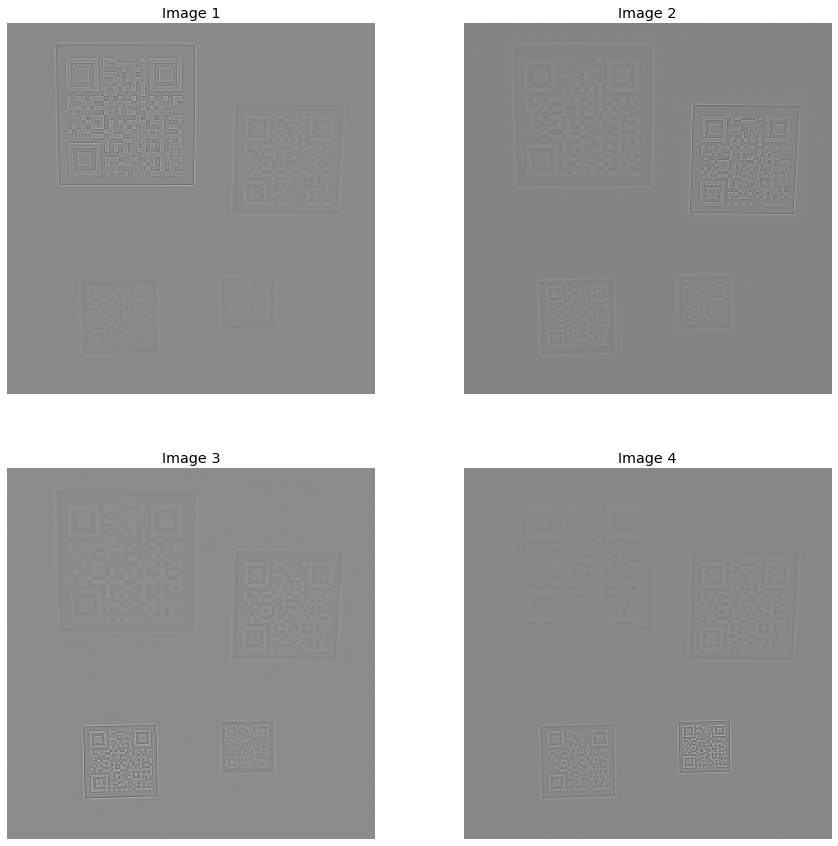

In [4]:
# Create new list of images with Gaussian Blur
GAUSSIAN_IMAGES = []

# Compute Gaussian Blur
for IMG in RAW_IMAGES:
    IMAGE = cv.cvtColor(IMG, cv.COLOR_BGR2GRAY)
    BLUR = cv.GaussianBlur(IMAGE, (5, 5), 0)
    GAUSSIAN_IMAGES.append(BLUR)

# Create new list of images with Laplacian Edge Detection
EDGES_IMAGES = []

# Compute Laplacian Edge Detection
for IMG in GAUSSIAN_IMAGES:
    EDGES = cv.Laplacian(IMG, 5)
    EDGES_IMAGES.append(EDGES)

# Plot new images
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax = axes.ravel()
ax[0] = plt.subplot(2, 2, 1)
ax[1] = plt.subplot(2, 2, 2)
ax[2] = plt.subplot(2, 2, 3)
ax[3] = plt.subplot(2, 2, 4, sharex=ax[0], sharey=ax[0])

ax[0].imshow(EDGES_IMAGES[0], cmap=plt.cm.gray)
ax[0].set_title('Image 1')
ax[0].axis('off')

ax[1].imshow(EDGES_IMAGES[1], cmap=plt.cm.gray)
ax[1].set_title('Image 2')
ax[1].axis('off')

ax[2].imshow(EDGES_IMAGES[2], cmap=plt.cm.gray)
ax[2].set_title('Image 3')
ax[2].axis('off')

ax[3].imshow(EDGES_IMAGES[3], cmap=plt.cm.gray)
ax[3].set_title('Image 4')
ax[3].axis('off')

plt.show()

## **4. Generate in-focus image**

In [ ]:
# Convert images to array
laps = np.asarray(EDGES_IMAGES)

# Create new image
FOCUS_IMAGE = np.zeros(shape=RAW_IMAGES[0].shape, dtype=RAW_IMAGES[0].dtype)

# Select best pixels
for y in range(RAW_IMAGES[0].shape[0]):
  for x in range(RAW_IMAGES[0].shape[1]):
    yxlaps = abs(laps[:, y, x])
    index = (np.where(yxlaps == max(yxlaps)))[0][0]
    FOCUS_IMAGE[y,x] = RAW_IMAGES[index][y,x]

INFOCUS = cv.imwrite('infocus_img.jpg', FOCUS_IMAGE)

# Plot in-focus images
plt.figure(figsize=(10, 10))
plt.imshow(FOCUS_IMAGE)
plt.axis('off')
plt.show()